In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')

### Задание 1. 
Провести предобработку данных. Особое внимание следует уделить столбцам «age» и «Дата первого занятия».

Импортируем предоставленные файлы и выведем основную информацию. 

In [247]:
df = pd.read_csv('/Users/zvizda/Downloads/2021.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2172 non-null   int64  
 1   age                   2022 non-null   float64
 2   Дата первого занятия  2172 non-null   object 
 3   Курс                  2172 non-null   object 
 4   М2                    2172 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 85.0+ KB


,id,age,Дата первого занятия,Курс,М2
0,2538,11.0,28.02.2021,Unity,0
1,2615,12.0,14.02.2021,Unity,0
2,2643,14.0,21.02.2021,Веб-дизайн,1
3,2968,11.0,24.01.2021,Python Базовый,0
4,3014,15.0,14.03.2021,Веб-дизайн,1


Даты загружены в неверном формате, а так же есть пропуски

Переименуем для удобства колонки в данных и заменим формат даты

In [248]:
df.columns = ['id','age','first_date', 'course', 'm2']
df['first_date'] = pd.to_datetime(df['first_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2172 non-null   int64         
 1   age         2022 non-null   float64       
 2   first_date  2172 non-null   datetime64[ns]
 3   course      2172 non-null   object        
 4   m2          2172 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 85.0+ KB


В столбце возраст есть пропуски, нет данных о 150 студентах. Проверим есть ли повторяющиеся значения в столбце id.

In [249]:
len(df['id'].unique())

2172

Кол-во уникальный значений в столбце совпадает с кол-ом строк, значит по id восстановить возраст не получится. Других вариантов с текущими данными нет. для 2-го задания возраст студента не важен, а для 3-го придется убрать. 

Проведем проверку на дубликаты

In [250]:
dupl = df[df.duplicated()]
dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          0 non-null      int64         
 1   age         0 non-null      float64       
 2   first_date  0 non-null      datetime64[ns]
 3   course      0 non-null      object        
 4   m2          0 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 0.0+ bytes


Дубликаты не обнаружены

### Задание 2. 
Учебный отдел обратился с просьбой о создании аналитического отчёта. Необходимо предоставить график по оттоку учеников в разрезе 3х курсов: Python Базовый, Веб-дизайн и Unity. Нас интересует отток только при переходе с первого модуля обучения на второй. Результатом отчёта будет являться график, состоящий из столбчатых диаграмм. Ось OX - курсы, OY - количество учеников. Столбцов на графике должно быть минимум 6 (по 2 на каждый курс). В первых столбцах каждого курса - количество учеников на первом модуле, во вторых столбцах - количество учеников на втором модуле. Также необходимо добавить дополнительную ось OY с ломаной линией для наглядного представления доли оттока. Например, по курсу Python Базовый на первом модуле было 100 учеников, на втором модуле осталось 60, следовательно, доля оттока составляет 40%. Помимо графика предоставьте короткий письменный вывод о результатах проведенного исследования.

Из описания не совсем понятно если студент закончил первый модуль 01.04.2021 можно ли его считать выбывшим или он просто не успел начать модуль 2? через какой промежуток времени после завершения первого модуля начинается второй, про это в условии нет. будем думать что 1 день у студента точно есть. 

Сформируем данные по студентам, которые успели бы закончить 1-ый модуль 31.03.2021, так как модуль длится 4 недели, начать они должны были не позднее 4 марта. 

In [251]:
df2 = df.query('first_date <= "04-03-2021"')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2021 non-null   int64         
 1   age         1882 non-null   float64       
 2   first_date  2021 non-null   datetime64[ns]
 3   course      2021 non-null   object        
 4   m2          2021 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 94.7+ KB


In [252]:
z = df2.pivot_table(index='course', columns = 'm2', values = 'id', aggfunc = 'count'). reset_index()
z

m2,course,0,1
0,Python Базовый,914,505
1,Unity,127,53
2,Веб-дизайн,239,183


In [253]:
z['1m'] = z[0]+z[1]
z['%'] = (z[0]/z['1m'] *100).round(0)
z.columns=['Курс', 'Ушли в отток', 'Студенты 2 модуля', 'Студенты 1 модуля', '% оттока']
z

,Курс,Ушли в отток,Студенты 2 модуля,Студенты 1 модуля,% оттока
0,Python Базовый,914,505,1419,64.0
1,Unity,127,53,180,71.0
2,Веб-дизайн,239,183,422,57.0


Добавим дополнительный столбец для удобного построения графика

In [254]:
z['x'] = [1,2,3]

,Курс,Ушли в отток,Студенты 2 модуля,Студенты 1 модуля,% оттока,x
0,Python Базовый,914,505,1419,64.0,1
1,Unity,127,53,180,71.0,2
2,Веб-дизайн,239,183,422,57.0,3


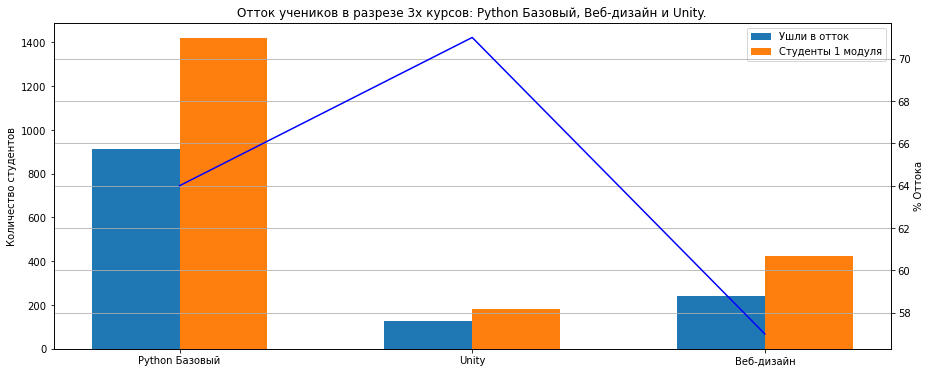

In [255]:
y1 = z['Ушли в отток']
y2 = z['Студенты 1 модуля']
width = 0.3
x = z['x']
fig, ax = plt.subplots()
r1 = ax.bar(x - width/2, y1, width, label='Ушли в отток')
r2 = ax.bar(x + width/2, y2, width, label='Студенты 1 модуля')
ax1 = ax.twinx()
ax1.plot(z['x'],z['% оттока'],color='b')
fig.set_figwidth(15)    
fig.set_figheight(6)  
ax.set_title('Отток учеников в разрезе 3х курсов: Python Базовый, Веб-дизайн и Unity.')
ax.set_xticks(x)
ax.set_xticklabels(['Python Базовый','Unity','Веб-дизайн'])
ax.set_ylabel('Количество студентов')
ax1.set_ylabel('% Оттока')
ax.legend()
plt.grid()
plt.show()

### Вывод:
Самый низкий процент оттока на курсе по веб-дизайну 57% ,самый высокий по Unity 71%. Больше всего студентов занимаются на курсе phyton базовый, в нем процент оттока составляет 64%. Показатели оттока находятся примерно на одном уровне для всех курсов, можно сказать что из 3-х студентов только один начинает 2-ой модуль. 
Для выяснения причин такого высокого значения показателя необходимо провести дополнительные исследования.

### Дополнительное задание. 
Также учебному отделу хочется увидеть динамику оттока курса Python Базовый по возрастам, чтобы четко определить верхние и нижние границы возраста при формировании новых групп обучения. Существует гипотеза, что дети младше 12 и старше 14 лет чаще переходят в отток. Для того, чтобы принять или опровергнуть гипотезу, необходимо предоставить наглядные данные в виде столбчатых диаграмм (как в первом задании). Ось OX - возраста в порядке возрастания, ось OY - количество учеников. Первые столбцы для каждого возраста - количество учеников на первом модуле обучения, вторые столбцы для каждого возраста - количество учеников на втором модуле обучения. Также необходимо добавить дополнительную ось OY с ломаной линией для наглядного представления доли оттока. Например, на первом модуле обучения в возрасте 10 лет было 20 учеников, на втором модуле осталось 15, следовательно, доля оттока составляет 25%. Помимо графика предоставьте короткий письменный вывод о результатах проведенного исследования.

Уберем из таблицы студентов без данных о возрасте.

In [256]:
df3 = df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 2171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          1882 non-null   int64         
 1   age         1882 non-null   float64       
 2   first_date  1882 non-null   datetime64[ns]
 3   course      1882 non-null   object        
 4   m2          1882 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 88.2+ KB


In [257]:
df3 = df3.query('course == "Python Базовый"')

In [258]:
w = df3.pivot_table(index='age', columns = 'm2', values = 'id', aggfunc = 'count'). reset_index()
w = w.fillna(0)
w['all'] = w[0]+w[1]
w['%'] = (w[0]/w['all'] *100).round(0)
w.columns=['Возраст', 'Ушли в отток', 'Студенты 2 модуля', 'Студенты 1 модуля', '% оттока']
w

,Возраст,Ушли в отток,Студенты 2 модуля,Студенты 1 модуля,% оттока
0,8.0,4.0,0.0,4.0,100.0
1,9.0,2.0,5.0,7.0,29.0
2,10.0,26.0,15.0,41.0,63.0
3,11.0,125.0,55.0,180.0,69.0
4,12.0,258.0,124.0,382.0,68.0
5,13.0,187.0,130.0,317.0,59.0
6,14.0,145.0,83.0,228.0,64.0
7,15.0,74.0,39.0,113.0,65.0
8,16.0,29.0,15.0,44.0,66.0
9,17.0,4.0,1.0,5.0,80.0


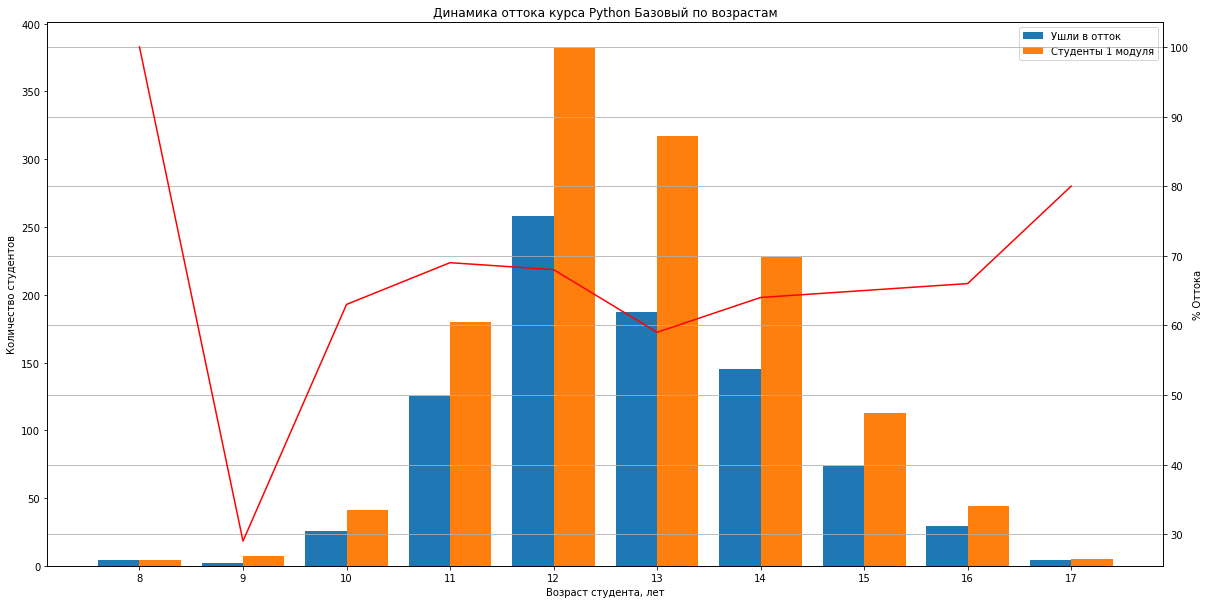

In [259]:
x1 = w['Возраст'] - 0.2
x2 = w['Возраст'] + 0.2
y1 = w['Ушли в отток']
y2 = w['Студенты 1 модуля']
fig, ax = plt.subplots()
ax.bar(x1, y1, width = 0.4, label = 'Ушли в отток')
ax.bar(x2, y2, width = 0.4, label = 'Студенты 1 модуля')
ax1 = ax.twinx()
ax1.plot(w['Возраст'],w['% оттока'],color='r')
fig.set_figwidth(20)    
fig.set_figheight(10)  
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.legend()
ax.set_xlabel('Возраст студента, лет')
ax.set_ylabel('Количество студентов')
ax1.set_ylabel('% Оттока')
plt.grid()
plt.title('Динамика оттока курса Python Базовый по возрастам')
plt.show()

### Вывод:
Самый высокий процент оттока у студентов в возрасте 8 лет 100%, самый низкий у студентов 9 лет. Эти две возрастные категории одни из самых малочисленных, делать по ним выводы не стоит.  
По графику видно что начиная с 10 и до 16 лел, уровень оттока находится между 60 и 70 %, и лишь в группе 13 лет, снижается ниже 60%. 
Существует гипотеза, что дети младше 12 и старше 14 лет чаще переходят в отток. На графике видно снижение уровня оттока в этих возрастных группах.

In [ ]:
#В задании не указано, но принимать и опровергать гипотезы только по графикам я бы не стала. 
#Например с помошью хи-квадрата можно проверить статистически значима ли эта разница для этих 2-х выборок. 
#Мне нравится пользоваться этим счетчиком https://www.evanmiller.org/ab-testing/chi-squared.html
# Для текущих условий можно сказать, что разница в оттоке между студентами младше 12 либо страше 14 
#и студентами 12-14 лет статистически значима